# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

This data problem can be defined as developing a predictive model using multiple linear regression to analyze the relationships between various features (such as mileage, age, brand, model, condition, etc.) of used cars and their corresponding prices. The objective is to identify the key drivers or predictor variables that have the most significant impact on used car prices, enabling the business to understand the factors that influence pricing and make informed decisions for the used car dealer based on the insights gained from the model.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import plotly.express as px
import matplotlib.pyplot as plt

In [206]:
# Load the dataset and drop NA rows
df = pd.read_csv('data/vehicles.csv').dropna()
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,7303227528,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy
426792,7303114896,wyoming,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,1FT8W3DT3EEB41548,4wd,full-size,pickup,brown,wy
426793,7303112347,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,1G1BE5SM7J7133704,fwd,mid-size,sedan,black,wy
426833,7302338378,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,SAJGX2749VCOO8376,rwd,compact,convertible,white,wy


In [120]:
# Evaluate the dataset and identify the numerical columns and nonumerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34868 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  VIN           34868 non-null  object 
 13  drive         34868 non-null  object 
 14  size          34868 non-null  object 
 15  type          34868 non-null  object 
 16  paint_color   34868 non-null  object 
 17  state         34868 non-null  object 
dtypes: float64(2), int64(2)

In [173]:

df['paint_color'].value_counts()

white     9030
black     5955
silver    4458
grey      3961
blue      3121
red       2882
custom     864
green      836
brown      746
yellow     210
orange     151
purple      72
Name: paint_color, dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Based on the rough evaluation of the dataset, id, region, VIN, state are the feautres for the car identity and should play less impact on the price. So these columns can be dropped. For the datapoints with price = 0, it seems to result from wrong record, so these 0 price rows are deleted.  
The odometer column has some numbers >300K, which is very uncommon in reality and will be dropped.
In fuel, transmission, drive, one value dominated in each group and we can drop these to prevent overfitting. 
Type is associate with size and only the size will be included in the model. 


In [208]:
# Translate cylinders from object to numerical
df = df[(df['price'] != 0) & (df['cylinders'] != 'other') &(df['odometer'] <= 300000)]
df1 = df.replace({'4 cylinders': 4, '6 cylinders': 6, '8 cylinders': 8, 
            '10 cylinders': 10, '5 cylinders': 5, '3 cylinders': 3, '12 cylinders': 12})

In [209]:
df1 = df1.drop(['id', 'region', 'VIN', 'state', 'model', 'title_status', 'manufacturer', 'fuel', 'transmission', 'drive', 'type', 'paint_color'], axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32286 entries, 215 to 426833
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      32286 non-null  int64  
 1   year       32286 non-null  float64
 2   condition  32286 non-null  object 
 3   cylinders  32286 non-null  int64  
 4   odometer   32286 non-null  float64
 5   size       32286 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 1.7+ MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

First, build a very simpe model with only the features of 'odometer', as the 'odometer' usually correlated more with the price than the other two numerical features. 
Then, build a model with 'odometer', 'years', 'cylinders' (translate 'cylinder' into numerical). Compare the two models by MAE and MSE.

Split the dataset into 70% training data and 30% validation data.


In [178]:
# 
X1 = df1[['odometer']]
y1 = df1['price']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=22)

In [179]:
f1 = LinearRegression(fit_intercept = True)
f1.fit(X1_train, y1_train)

LinearRegression()

In [180]:
f1.coef_

array([-0.09638838])

In [181]:
y1_predict = f1.predict(X1_test)
mae_err1 = mean_absolute_error(y1_test, y1_predict)
mse_err1 = mean_squared_error(y1_test, y1_predict)
print(mae_err1)
print(mse_err1)

9070.103138128185
154274098.06726855


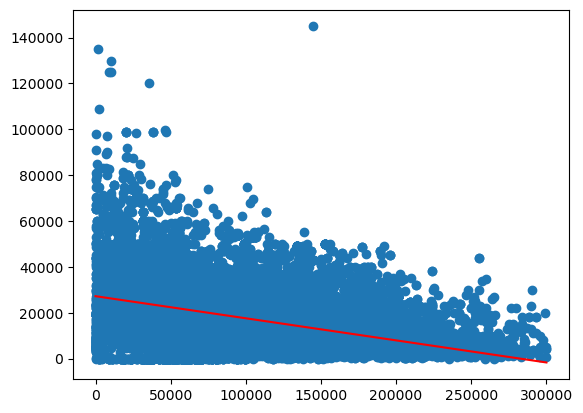

In [159]:
plt.scatter(x=X1_train, y=y1_train)
x = np.linspace(0, 300000, 1000)
plt.plot(x, f1.coef_*x + f1.intercept_, color='red')

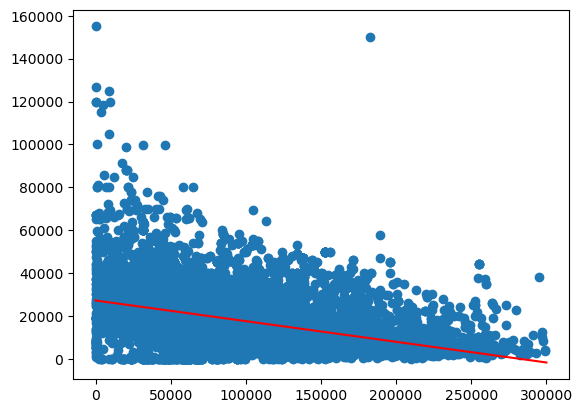

In [160]:
plt.scatter(x=X1_test, y=y1_test)
x = np.linspace(0, 300000, 1000)
plt.plot(x, f1.coef_*x + f1.intercept_, color='red')

In [136]:
X2 = df1[['year', 'odometer', 'cylinders']]
y2 = df1['price']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=22)

In [137]:
f2 = LinearRegression(fit_intercept = True)
f2.fit(X2_train, y2_train)

LinearRegression()

In [138]:
f2.coef_

array([ 5.25990485e+02, -5.78589158e-02,  3.17712207e+03])

In [139]:
y2_predict = f2.predict(X2_test)
mae_err2 = mean_absolute_error(y2_test, y2_predict)
mse_err2 = mean_squared_error(y2_test, y2_predict)
print(mae_err2)
print(mse_err2)

7133.698862212815
178102307.24577987


Include some critical nonumerical features.

In [216]:
dummies1 = pd.get_dummies(df1['condition'])
dummies2 = pd.get_dummies(df1['size'])
df2 = pd.concat([df1, dummies1, dummies2], axis=1).drop(['condition', 'size'], axis=1)
y3 = df2['price']
X3 = df2.drop('price', axis=1)
df2

,price,year,cylinders,odometer,excellent,fair,good,like new,new,salvage,compact,full-size,mid-size,sub-compact
215,4000,2002.0,4,155000.0,1,0,0,0,0,0,1,0,0,0
219,2500,1995.0,6,110661.0,0,1,0,0,0,0,0,0,1,0
268,9000,2008.0,4,56700.0,1,0,0,0,0,0,1,0,0,0
337,8950,2011.0,6,164000.0,1,0,0,0,0,0,0,1,0,0
338,4000,1972.0,6,88100.0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,23495,2015.0,8,146795.0,0,0,0,1,0,0,0,1,0,0
426788,12995,2016.0,4,61127.0,0,0,0,1,0,0,1,0,0,0
426792,32999,2014.0,8,154642.0,1,0,0,0,0,0,0,1,0,0
426793,15999,2018.0,4,36465.0,1,0,0,0,0,0,0,0,1,0


In [197]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=22)

In [198]:
f3 = LinearRegression(fit_intercept = True)
f3.fit(X3_train, y3_train)

LinearRegression()

In [199]:
f3.coef_

array([ 4.43396415e+02,  2.51560050e+03, -8.73858142e-02, -1.40055005e+02,
       -2.50269962e+03, -2.09202466e+02,  1.92257260e+03,  7.21111614e+03,
       -6.28173165e+03, -3.70340393e+03,  3.93145877e+03, -3.09425518e+01,
       -1.97112290e+02])

In [200]:
y3_predict = f3.predict(X3_test)
mae_err3 = mean_absolute_error(y3_test, y3_predict)
mse_err3 = mean_squared_error(y3_test, y3_predict)
print(mae_err3)
print(mse_err3)

6898.987418383197
107859037.43464988


Impact of manufacturer and paint color. Because these features can be used to categorize the data, it can be evaluate by comparing the mean of each category.

In [214]:
df.groupby('manufacturer')['price'].mean().sort_values()

manufacturer
saturn              4862.760870
mercury             5703.975309
land rover          6975.000000
fiat                9161.574468
chrysler            9302.724609
pontiac             9635.000000
hyundai             9763.077029
mini                9795.361446
kia                 9893.818021
mazda              10094.791005
honda              10393.437912
volkswagen         10675.943978
volvo              11326.427966
buick              11410.557423
acura              11554.450000
subaru             11755.411429
nissan             11873.842839
dodge              12327.353524
jaguar             12379.048780
lexus              13840.937824
bmw                14017.300585
lincoln            14236.369748
toyota             14413.357357
infiniti           15058.632743
datsun             15499.666667
cadillac           15542.771855
audi               15790.200980
mercedes-benz      16126.829177
jeep               16263.902973
mitsubishi         18477.720497
harley-davidson    19023.42

In [215]:
df.groupby('paint_color')['price'].mean().sort_values()

paint_color
purple     9844.222222
green     13189.899522
brown     13357.726542
silver    13501.064154
blue      14116.862864
grey      15166.687958
yellow    15564.847619
custom    15587.215278
red       17085.587092
black     18253.635264
orange    18285.788079
white     20583.731894
Name: price, dtype: float64

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

The validation set MSE and MAE are calculated for all of the three models. Cross-validation are used. Based on the MSE and MAE results, the error decreased when more features are included. 
However, the odometer feature has very good correation with the used car price. It is roughly linear with the used car price based on the plot of the first model. 
So, odometer is the most critical factor for car price, more odometer gives lower price. 
Other critical features are size, year, condition. 
For manufacturer, ferrari, aston-martin, porsche are the top 3 expensive brands. 
For paint_color, white, orange, black are the top 3 expensive colors.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

To the client,

The used car prices are generally linear with odometer, higher odometer gives lower car price. 

The average price with brands are ordered by: 
saturn              4862.760870
mercury             5703.975309
land rover          6975.000000
fiat                9161.574468
chrysler            9302.724609
pontiac             9635.000000
hyundai             9763.077029
mini                9795.361446
kia                 9893.818021
mazda              10094.791005
honda              10393.437912
volkswagen         10675.943978
volvo              11326.427966
buick              11410.557423
acura              11554.450000
subaru             11755.411429
nissan             11873.842839
dodge              12327.353524
jaguar             12379.048780
lexus              13840.937824
bmw                14017.300585
lincoln            14236.369748
toyota             14413.357357
infiniti           15058.632743
datsun             15499.666667
cadillac           15542.771855
audi               15790.200980
mercedes-benz      16126.829177
jeep               16263.902973
mitsubishi         18477.720497
harley-davidson    19023.428571
chevrolet          19323.060525
tesla              21250.500000
ford               21961.639154
rover              23731.082278
alfa-romeo         23893.133333
gmc                24493.267751
ram                27417.069086
porsche            31622.481481
aston-martin       57280.000000
ferrari            95829.444444

The average price with paint color are ordered by:
purple     9844.222222
green     13189.899522
brown     13357.726542
silver    13501.064154
blue      14116.862864
grey      15166.687958
yellow    15564.847619
custom    15587.215278
red       17085.587092
black     18253.635264
orange    18285.788079
white     20583.731894

You can use the two lists above to get more expensive manufacturer and color.

If you have the information of odometer, year, cylinder, condition and size, you can use model 3 to predict the price of this car.